<a href="https://colab.research.google.com/github/manoharreddyvoladri/Data-science-/blob/main/21BRS1177_LAB10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**VOLADRI MANOHAR REDDY**

**21BRS1177**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics.pairwise import euclidean_distances
from IPython.display import Video
from sklearn.datasets import fetch_openml
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import KernelPCA, PCA
from sklearn.decomposition import FastICA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [2]:
df=pd.read_csv('/content/bdiag.csv')
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [3]:
diag=df.drop(columns='id')
diag

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [4]:
diag['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [5]:
diag=diag.replace({'diagnosis': {'M': 0, 'B': 1}})

In [6]:
cols_req=diag.columns


diagnosis
Skew : -0.53


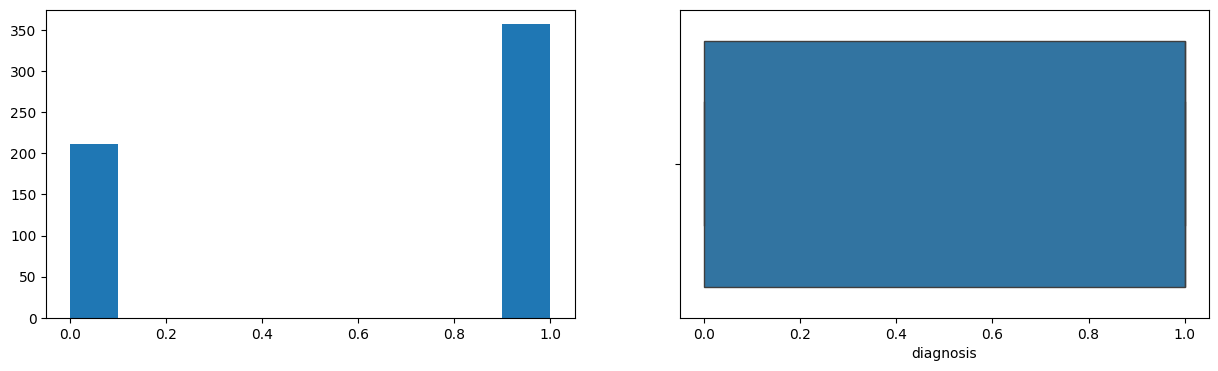

radius_mean
Skew : 0.94


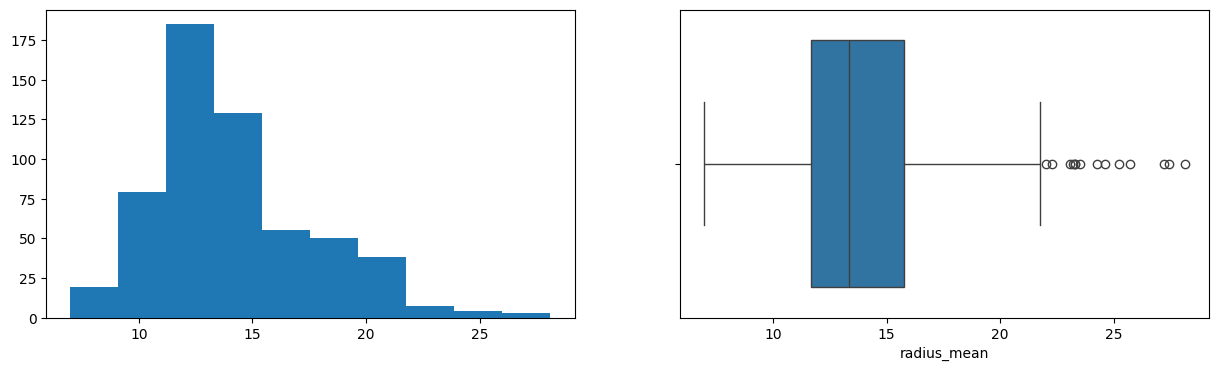

texture_mean
Skew : 0.65


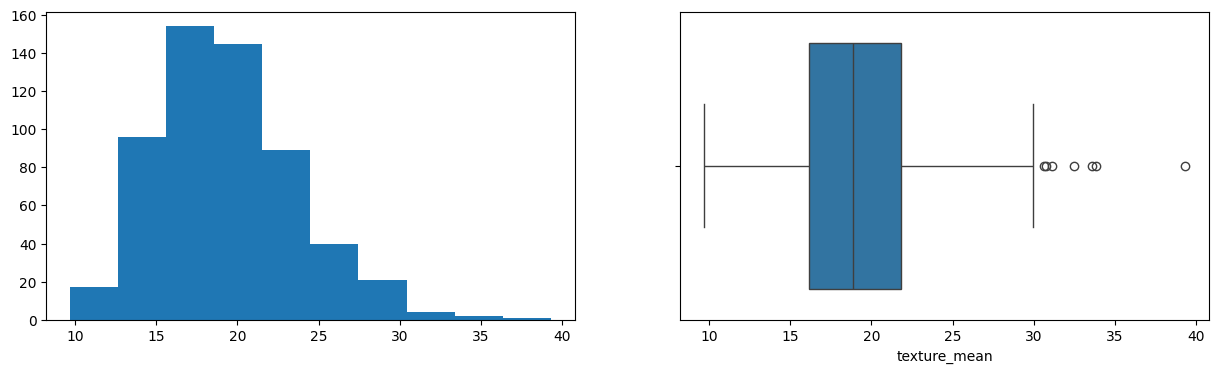

perimeter_mean
Skew : 0.99


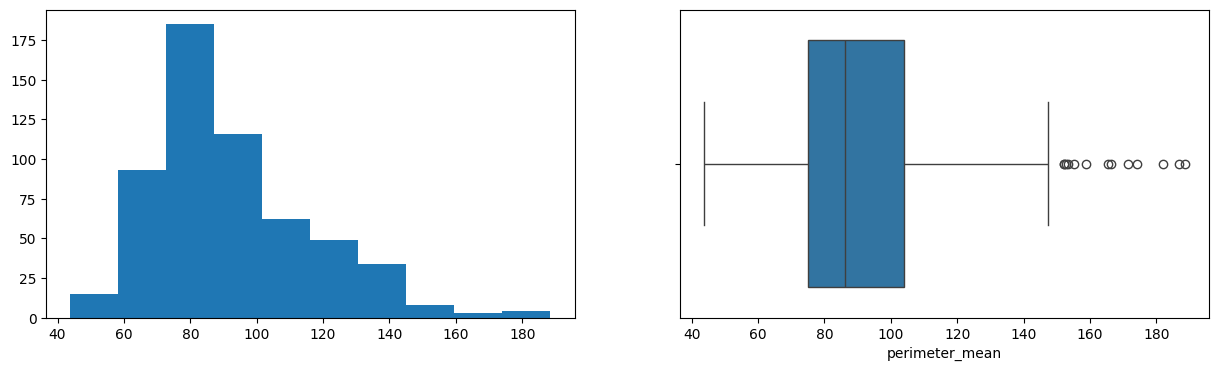

area_mean
Skew : 1.65


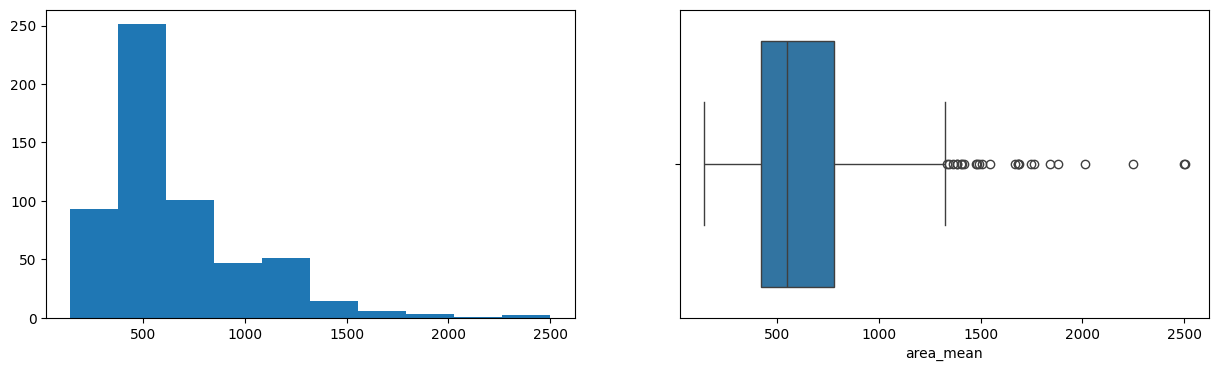

smoothness_mean
Skew : 0.46


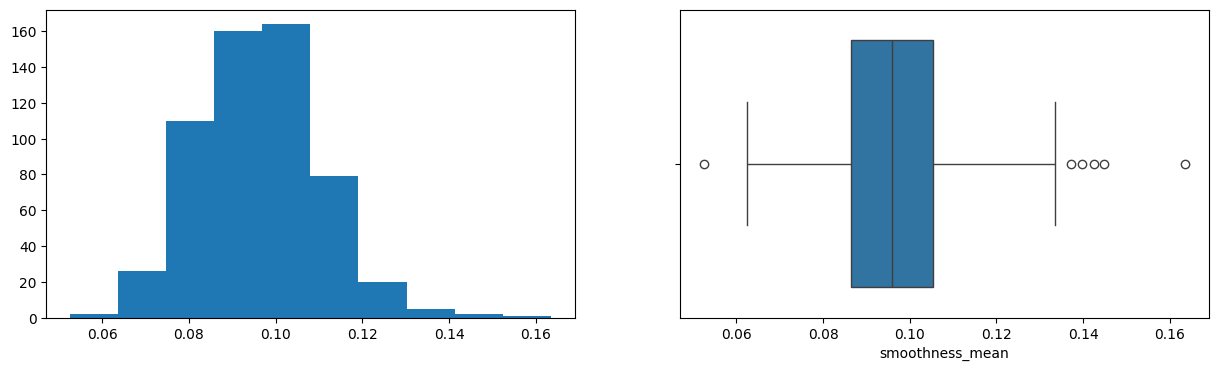

compactness_mean
Skew : 1.19


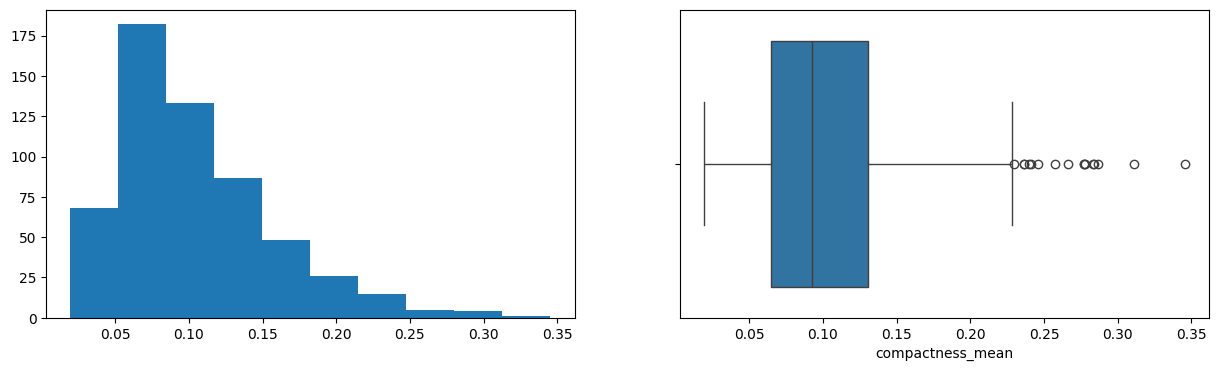

concavity_mean
Skew : 1.4


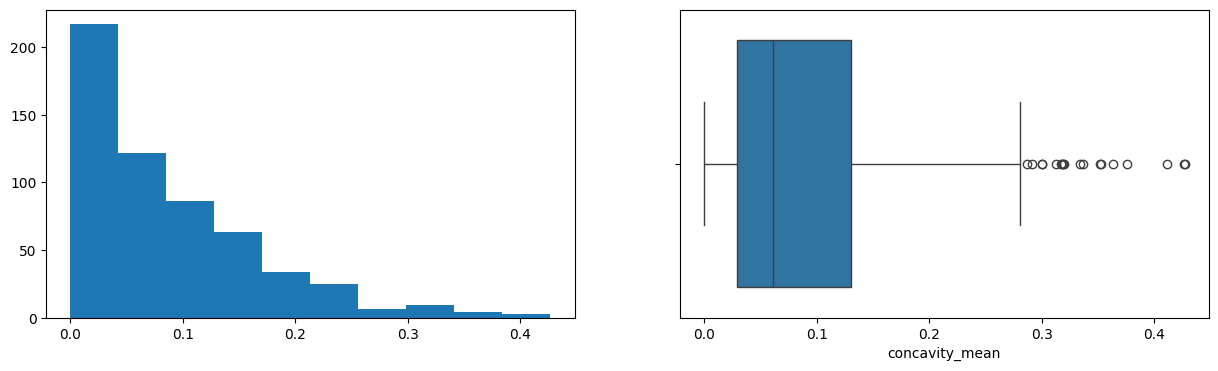

concave points_mean
Skew : 1.17


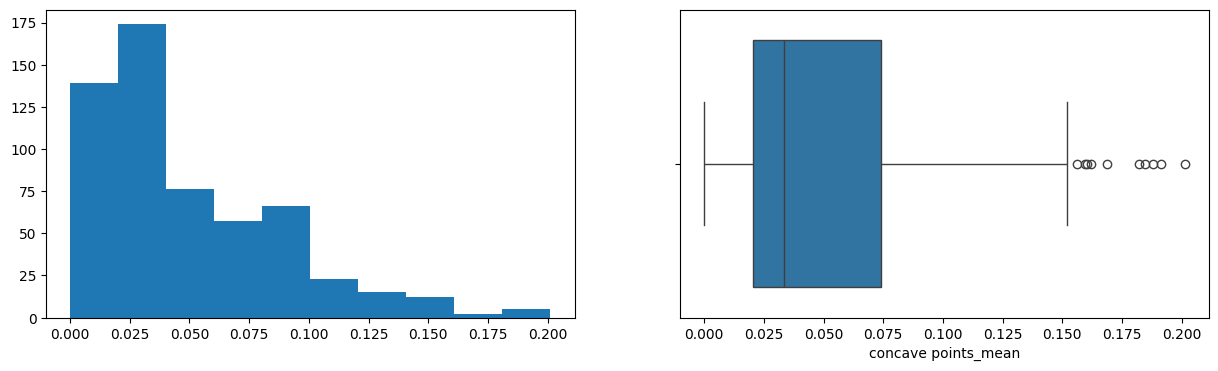

symmetry_mean
Skew : 0.73


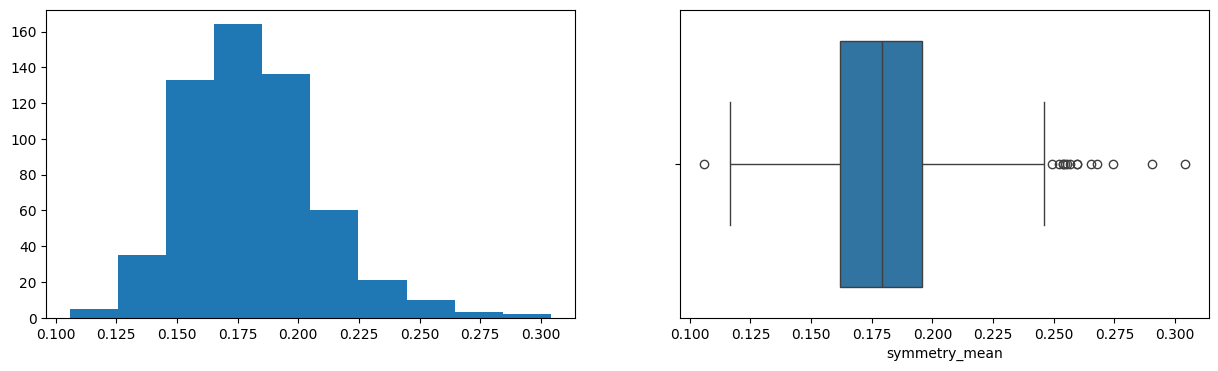

fractal_dimension_mean
Skew : 1.3


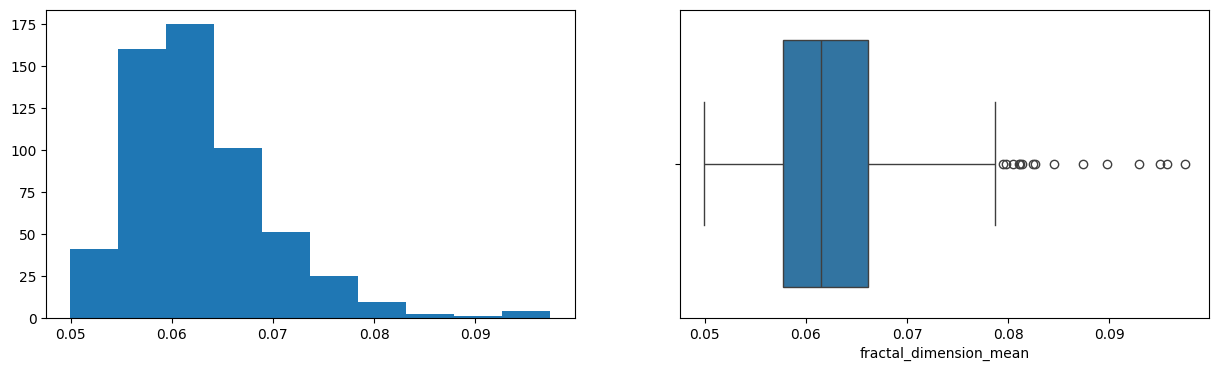

radius_se
Skew : 3.09


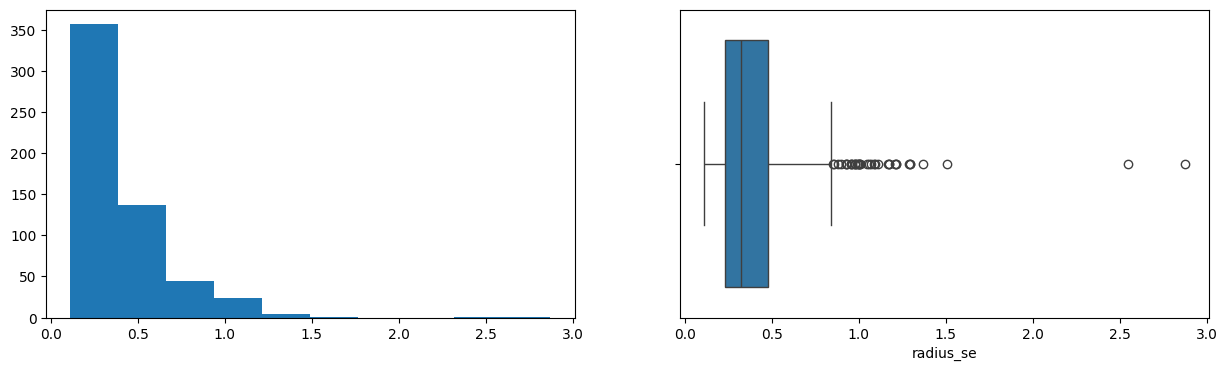

texture_se
Skew : 1.65


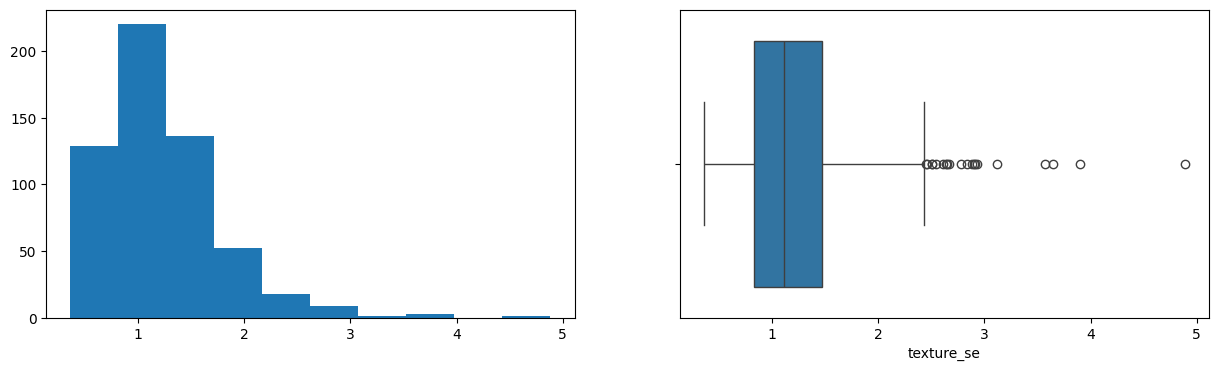

perimeter_se
Skew : 3.44


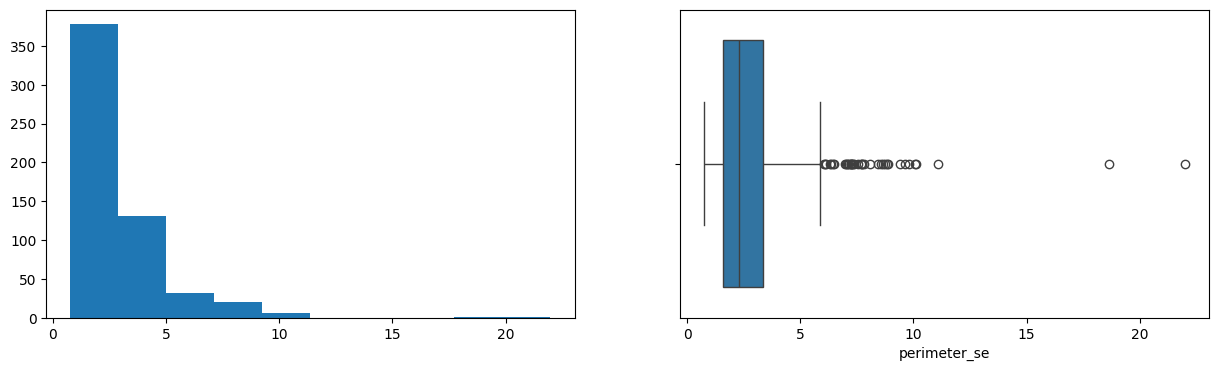

area_se
Skew : 5.45


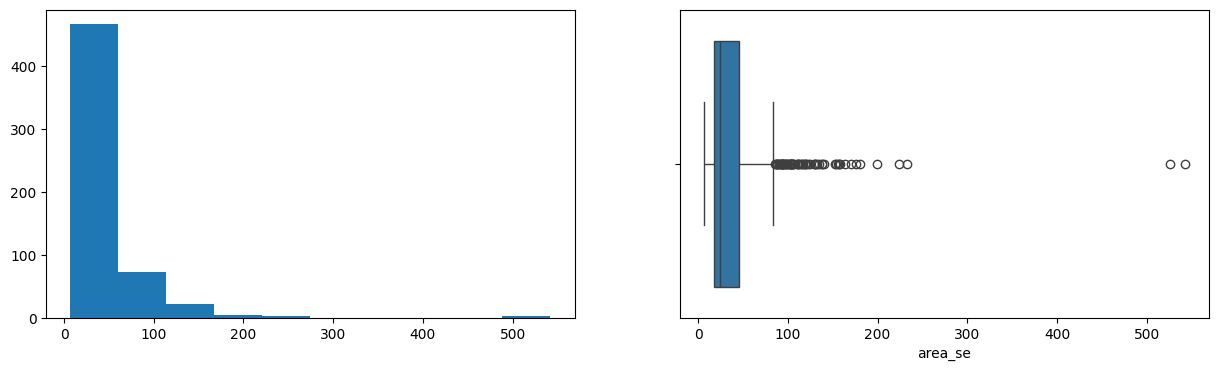

smoothness_se
Skew : 2.31


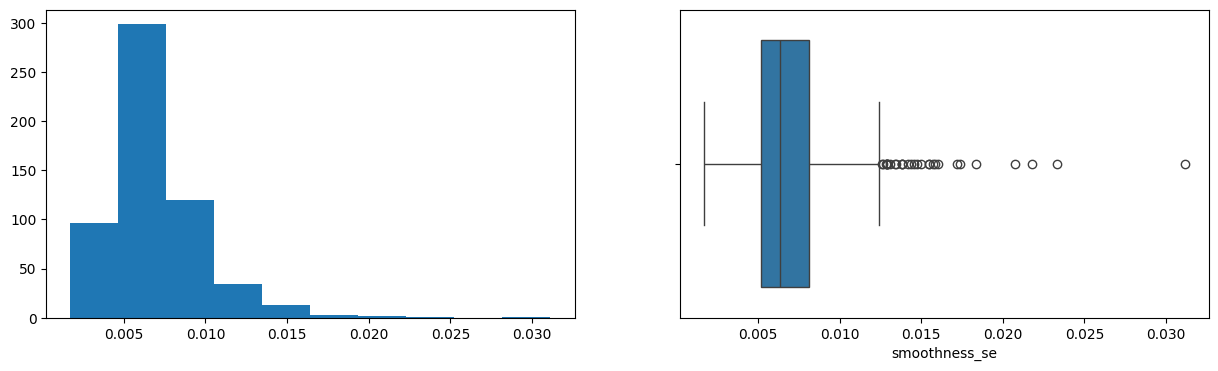

compactness_se
Skew : 1.9


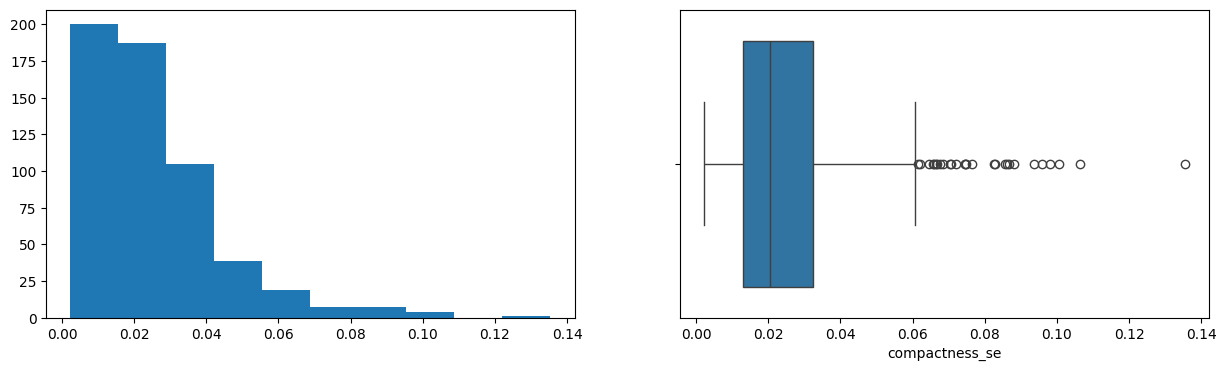

concavity_se
Skew : 5.11


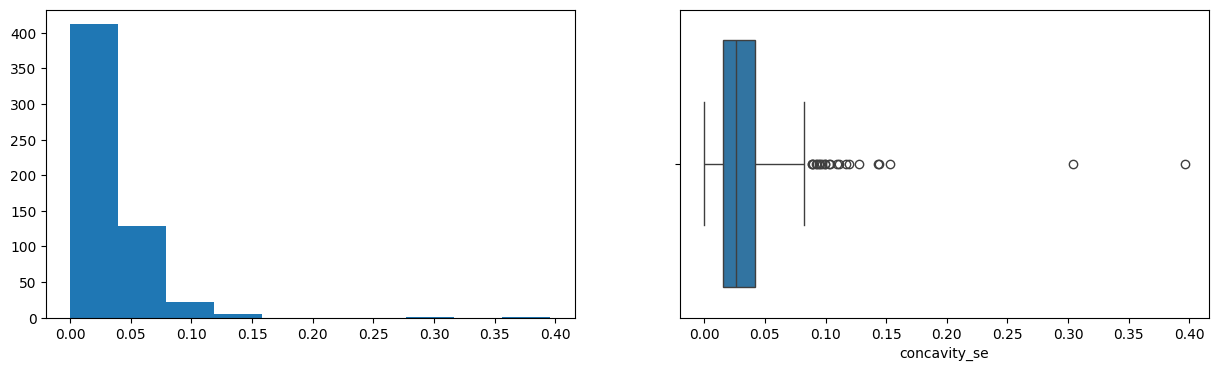

concave points_se
Skew : 1.44


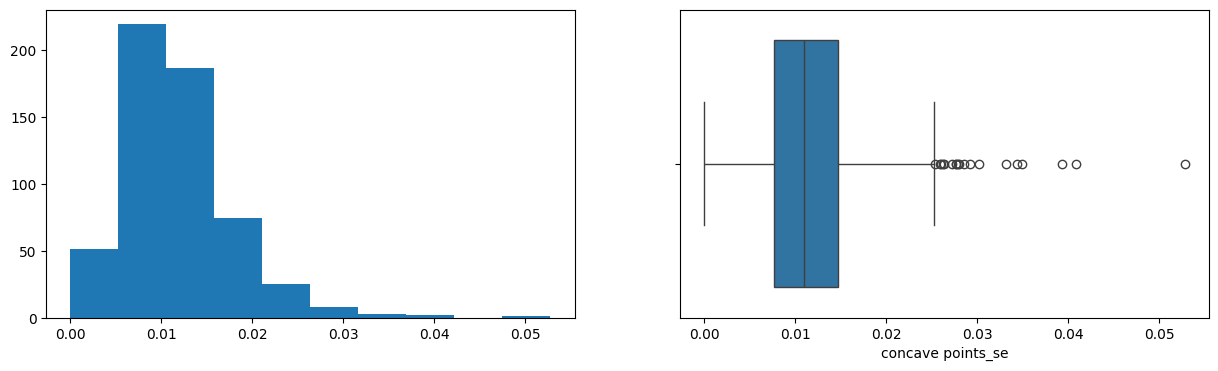

symmetry_se
Skew : 2.2


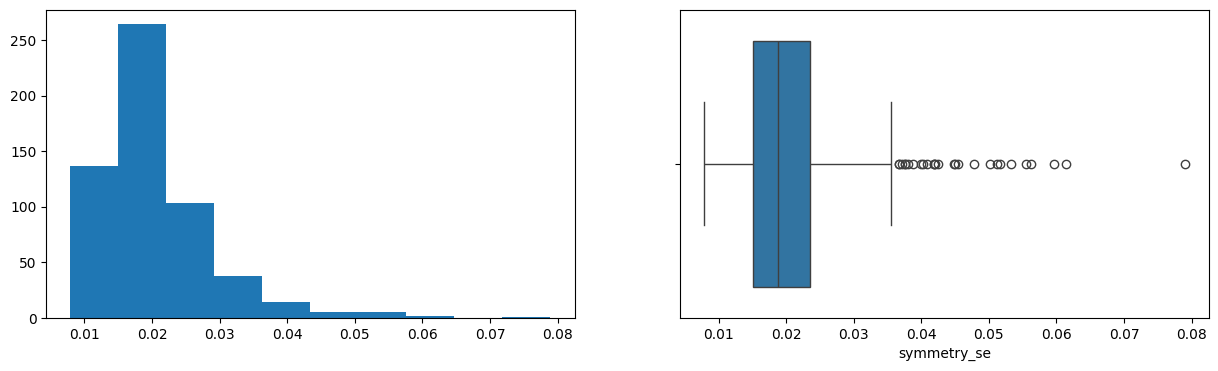

fractal_dimension_se
Skew : 3.92


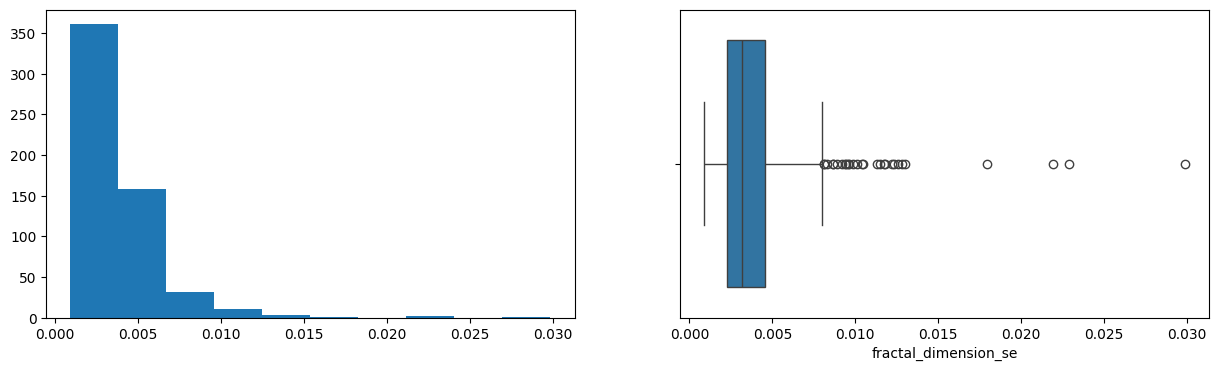

radius_worst
Skew : 1.1


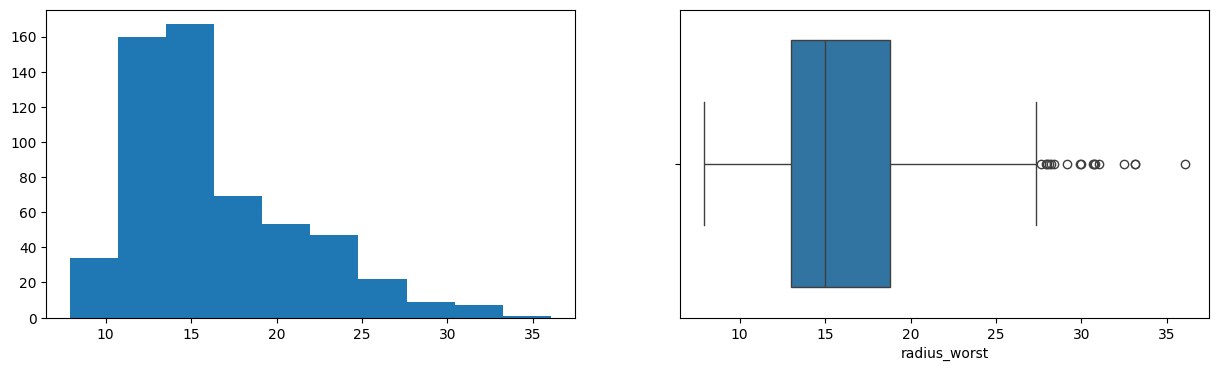

texture_worst
Skew : 0.5


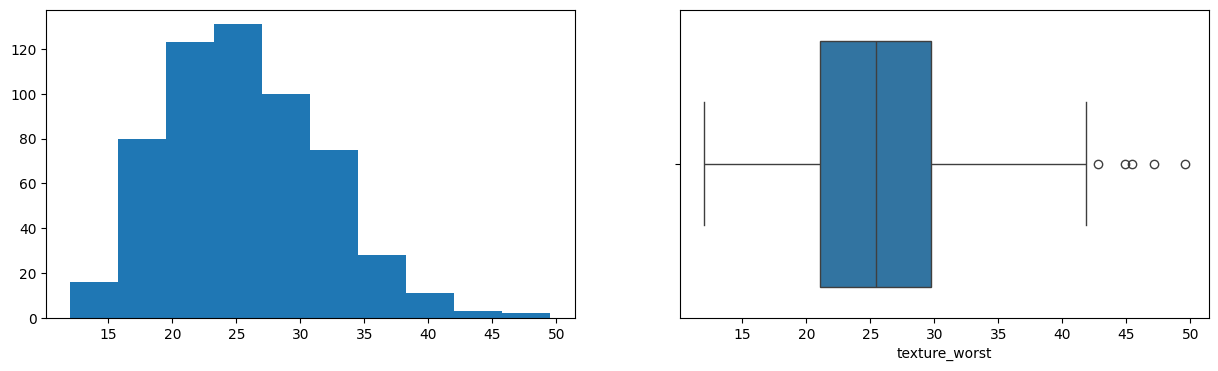

perimeter_worst
Skew : 1.13


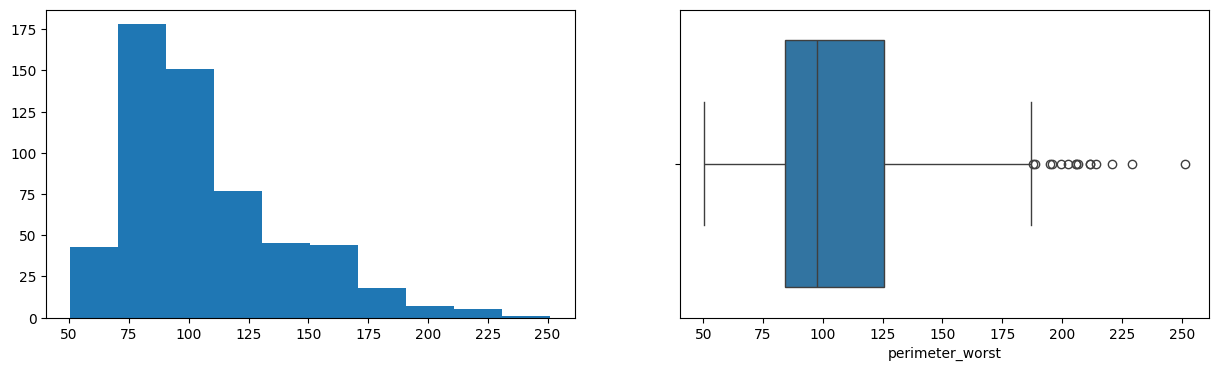

area_worst
Skew : 1.86


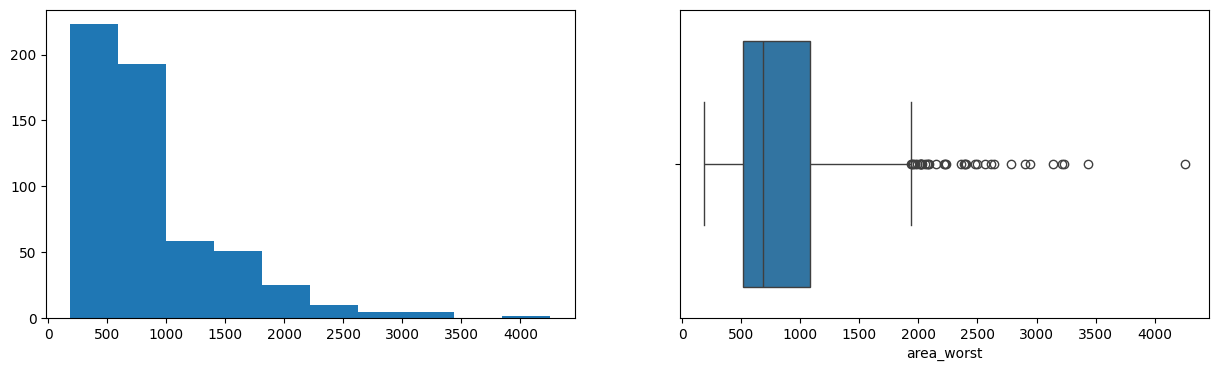

smoothness_worst
Skew : 0.42


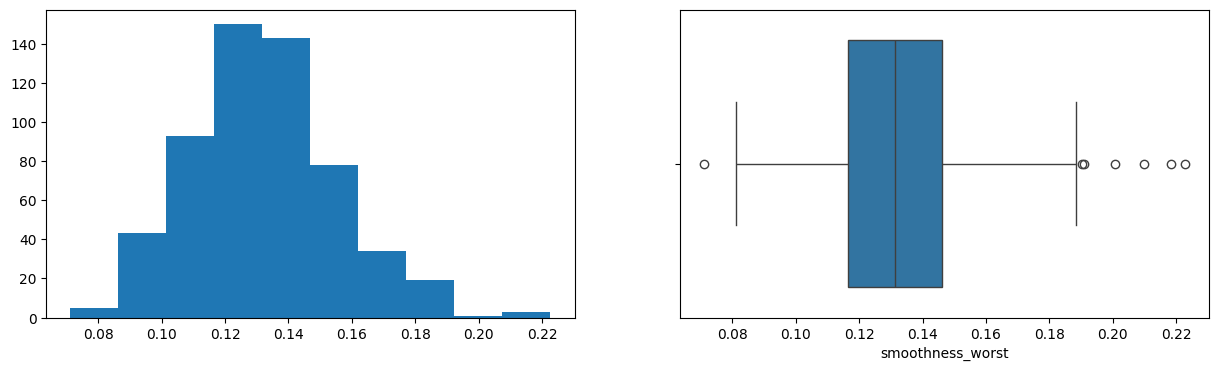

compactness_worst
Skew : 1.47


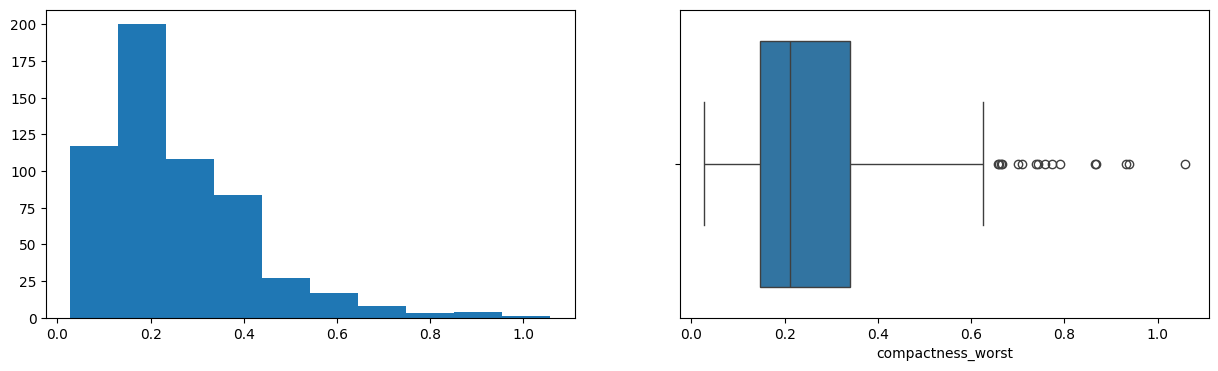

concavity_worst
Skew : 1.15


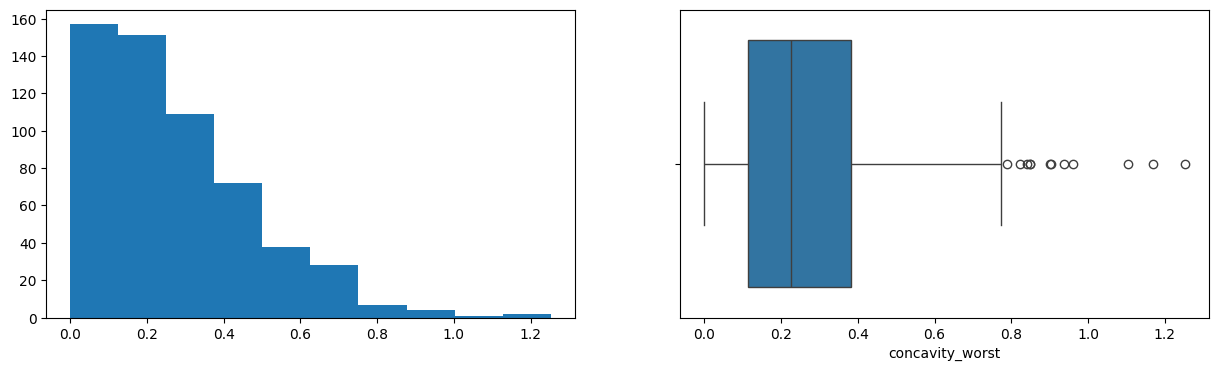

concave points_worst
Skew : 0.49


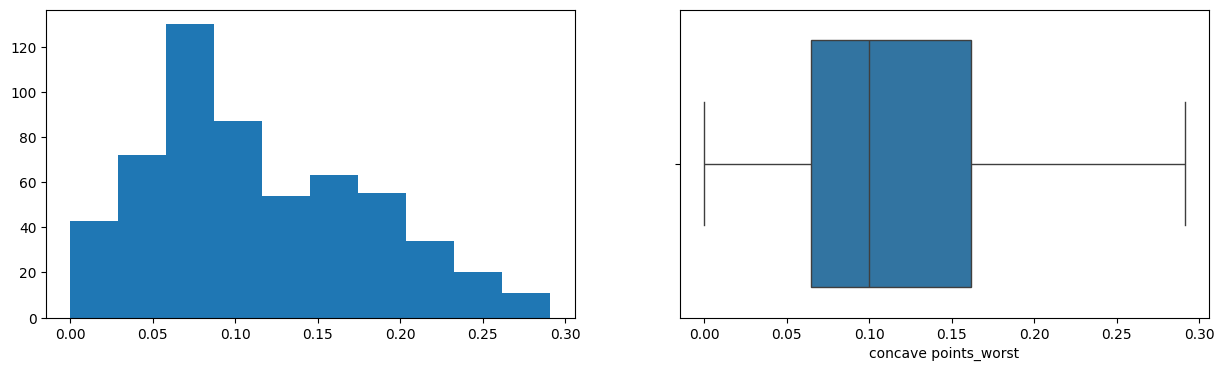

symmetry_worst
Skew : 1.43


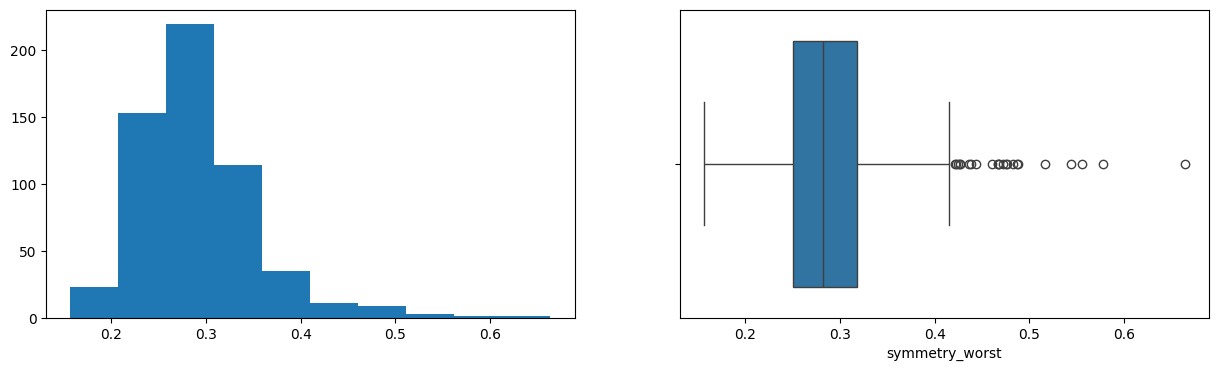

fractal_dimension_worst
Skew : 1.66


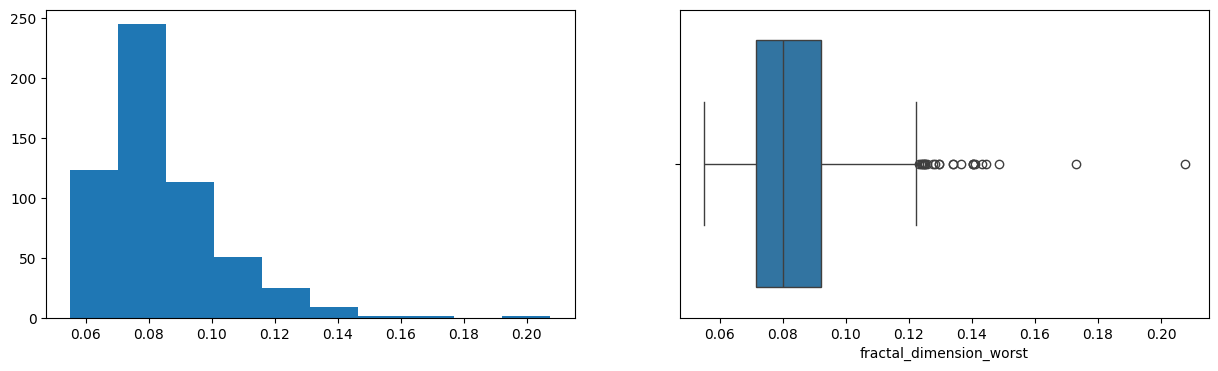

In [7]:
for col in cols_req:
    print(col)
    print('Skew :', round(diag[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    diag[col].hist(grid=False)
    plt.ylabel='count'
    plt.subplot(1, 2, 2)
    sns.boxplot(x=diag[col])
    plt.show()

In [8]:
diag_tar=diag['diagnosis']
diag=diag.drop(columns='diagnosis')

In [9]:
from sklearn import preprocessing
diag_x= preprocessing.normalize(diag)

In [10]:
from sklearn.cluster import AgglomerativeClustering
ward = AgglomerativeClustering(n_clusters=2)
ward_pred = ward.fit_predict(diag_x)

In [11]:
complete = AgglomerativeClustering(n_clusters=2, linkage="complete")
complete_pred = complete.fit_predict(diag_x)

In [12]:
avg = AgglomerativeClustering(n_clusters=2, linkage="average")
avg_pred = avg.fit_predict(diag_x)

In [13]:
from sklearn.metrics import adjusted_rand_score
ward_ar_score = adjusted_rand_score(diag_tar, ward_pred)
complete_ar_score = adjusted_rand_score(diag_tar, complete_pred)
avg_ar_score = adjusted_rand_score(diag_tar, avg_pred)

In [14]:
print( "Scores: \nWard:", ward_ar_score,"\nComplete: ", complete_ar_score, "\nAverage: ", avg_ar_score)

Scores: 
Ward: 0.6476369411061415 
Complete:  0.12674763010342596 
Average:  0.04667363215790398


In [15]:
from scipy.cluster.hierarchy import linkage
linkage_type = 'ward'
linkage_matrix = linkage(diag_x, linkage_type)

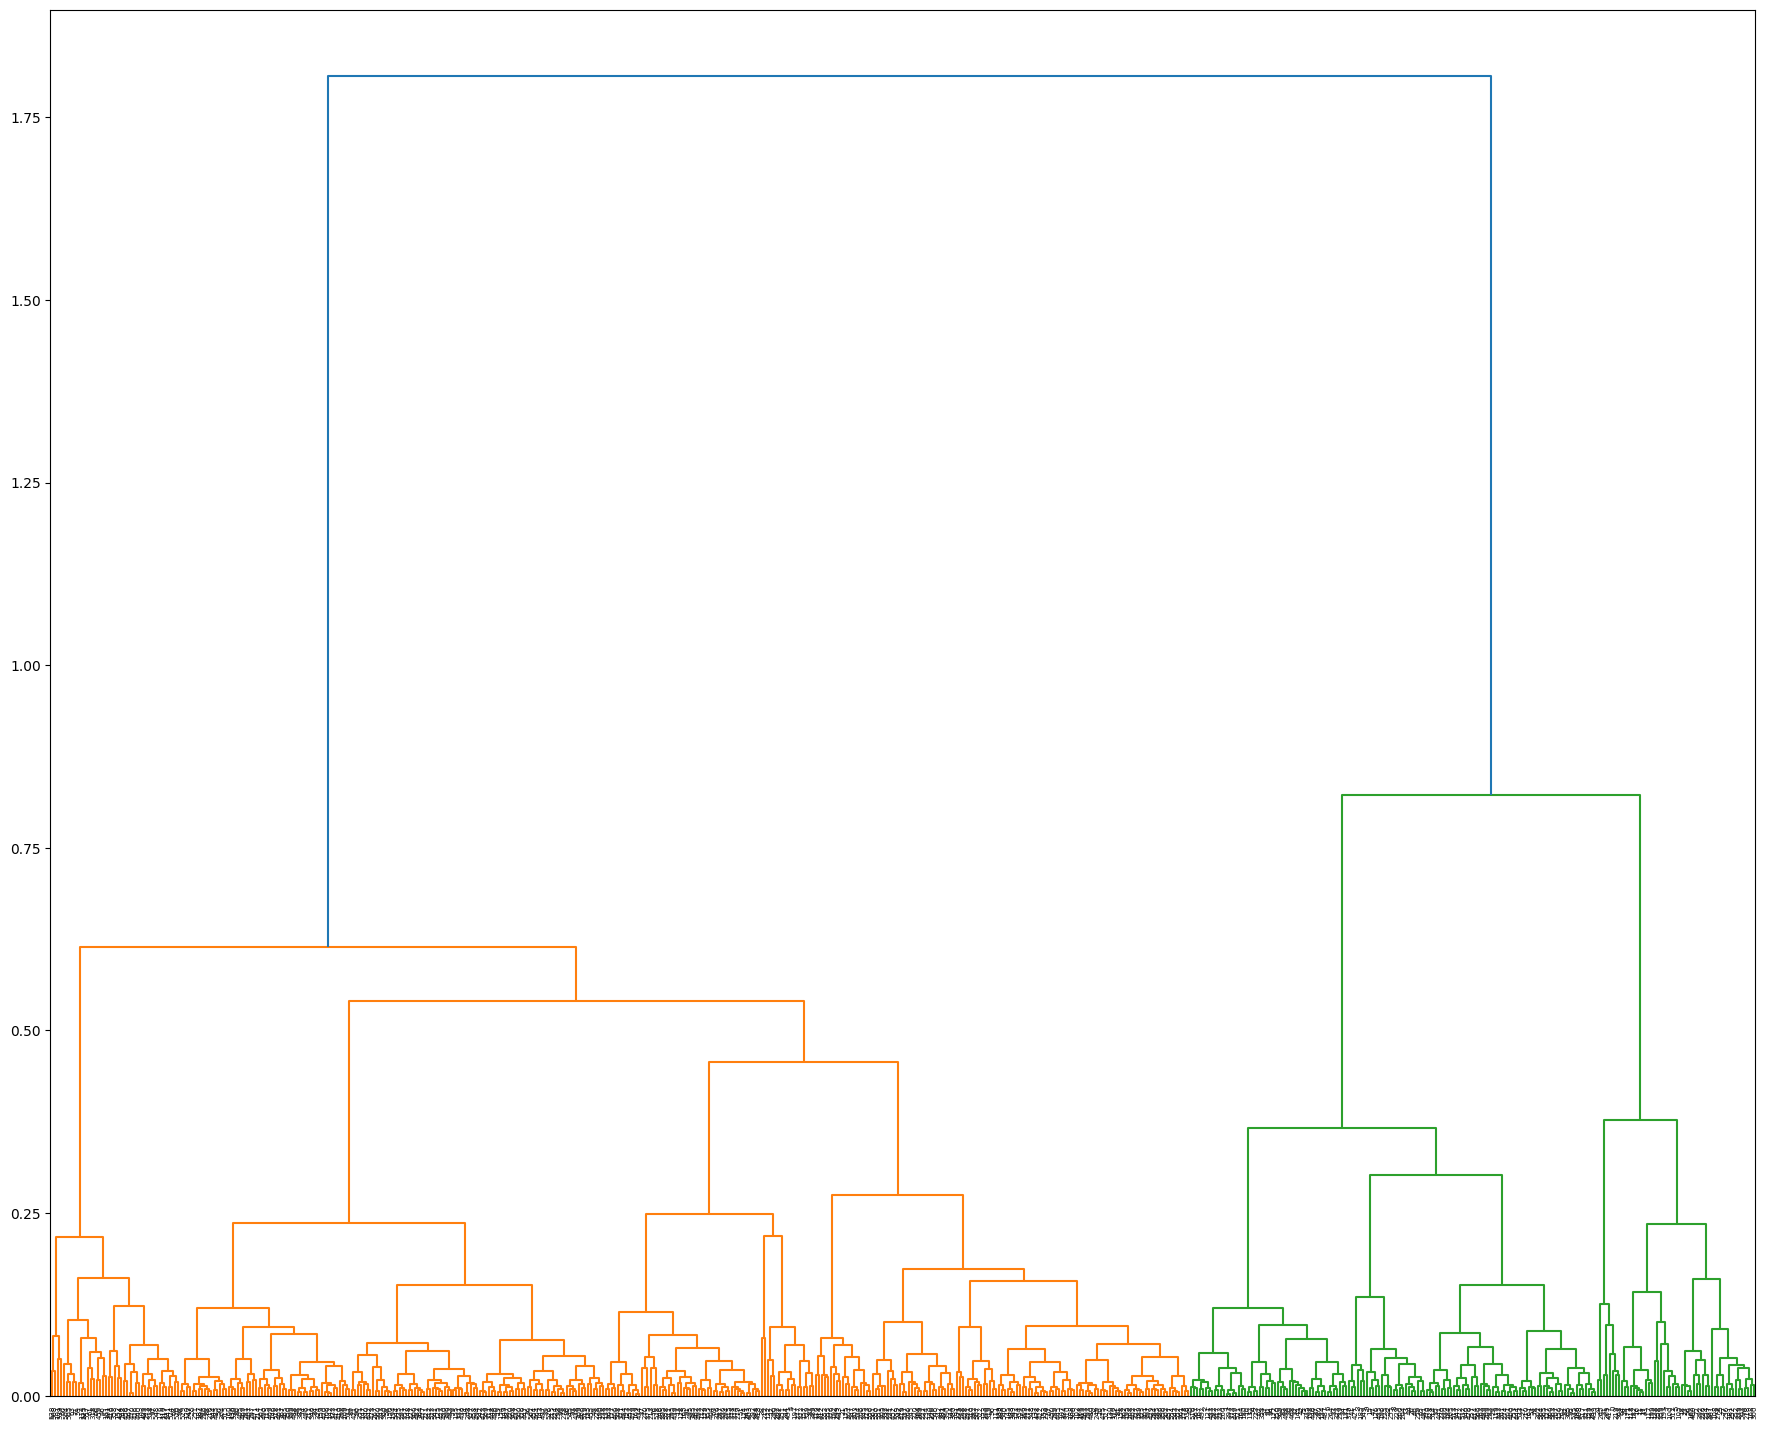

In [16]:
from scipy.cluster.hierarchy import dendrogram
plt.figure(figsize=(22,18))
dendrogram(linkage_matrix)
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


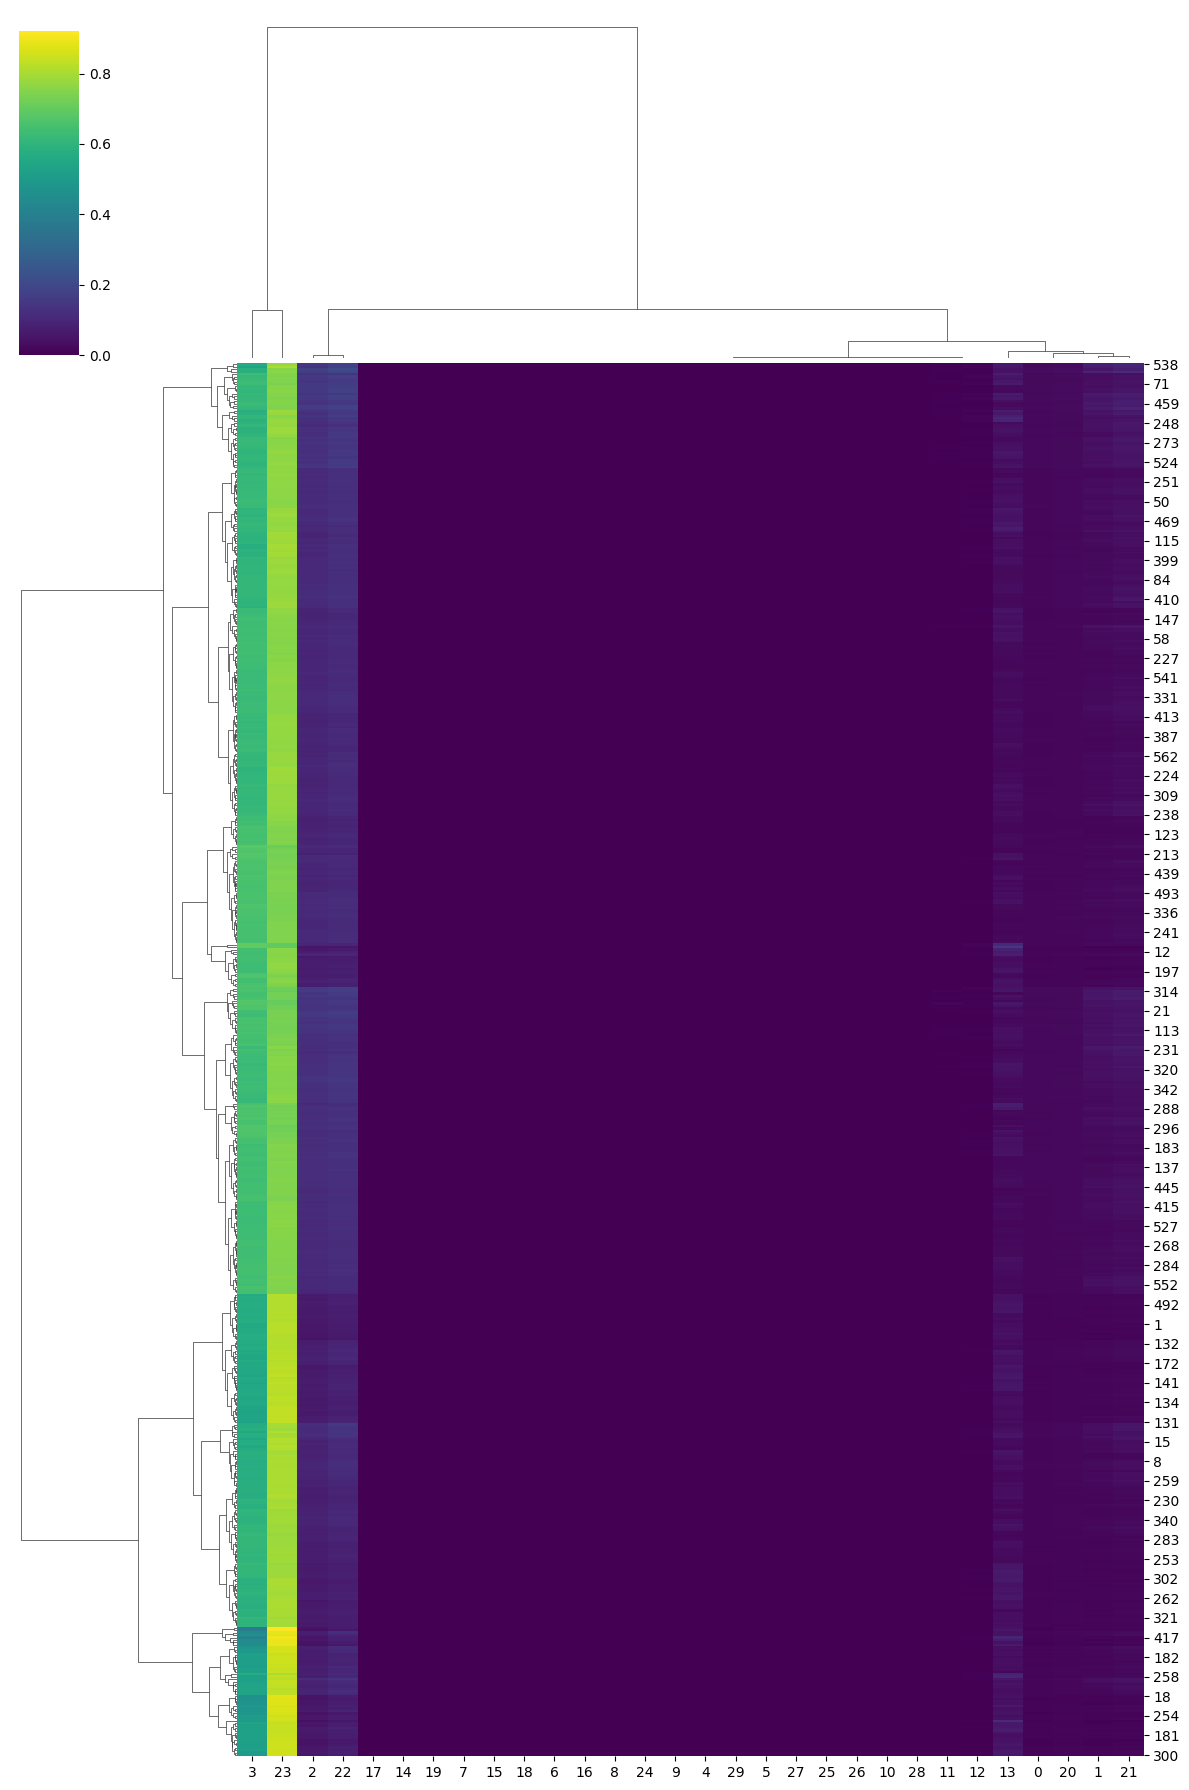

In [17]:
sns.clustermap(diag_x, figsize=(12,18), method=linkage_type, cmap='viridis')
plt.show()

In [18]:
distance_matrix = euclidean_distances(diag)
def compute_dunn_index(distance_matrix, cluster_assignments):
    num_clusters = len(np.unique(cluster_assignments))
    cluster_distances = [[] for _ in range(num_clusters)]
    for i in range(num_clusters):
        for j in range(i + 1, num_clusters):
            cluster_i_indices = np.where(cluster_assignments == i)[0]
            cluster_j_indices = np.where(cluster_assignments == j)[0]
            distances = distance_matrix[cluster_i_indices[:, None], cluster_j_indices]
            min_distance = np.min(distances)
            cluster_distances[i].append(min_distance)
            cluster_distances[j].append(min_distance)
    min_inter_cluster_distance = np.min([np.min(distances) for distances in cluster_distances])
    max_intra_cluster_distance = np.max([np.max(distances) for distances in cluster_distances])
    dunn_index = min_inter_cluster_distance / max_intra_cluster_distance
    return dunn_index
ward_dunn_index = compute_dunn_index(distance_matrix, ward_pred)
complete_dunn_index = compute_dunn_index(distance_matrix, complete_pred)
avg_dunn_index = compute_dunn_index(distance_matrix, avg_pred)
print("Dunn Index:")
print("Ward:", ward_dunn_index)
print("Complete:", complete_dunn_index)
print("Average:", avg_dunn_index)

Dunn Index:
Ward: 1.0
Complete: 1.0
Average: 1.0


In [19]:
X_train, X_test, y_train, y_test = train_test_split(diag_x,diag_tar, test_size=0.2, random_state=42)

In [20]:
n_components = 10

In [21]:
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [22]:
explained_variance_ratio = pca.explained_variance_ratio_
print('Explained variance ratio:', explained_variance_ratio)

Explained variance ratio: [7.62496868e-01 1.80990827e-01 4.17102189e-02 1.16757206e-02
 1.85579868e-03 6.52127060e-04 4.70685688e-04 7.49451684e-05
 3.49589063e-05 2.61823553e-05]


In [23]:
model_pca = SVC()
model_pca.fit(X_train_pca, y_train)

SVC()

In [24]:
accuracy_pca = model_pca.score(X_test_pca, y_test)
print('Accuracy with PCA:', accuracy_pca)

Accuracy with PCA: 0.9473684210526315


In [25]:
model_no_pca =SVC()
model_no_pca.fit(X_train, y_train)

SVC()

In [26]:
accuracy_no_pca = model_no_pca.score(X_test, y_test)
print('Accuracy without PCA:', accuracy_no_pca)

Accuracy without PCA: 0.9122807017543859


In [27]:
print('Accuracy improvement with PCA:', accuracy_pca - accuracy_no_pca)

Accuracy improvement with PCA: 0.03508771929824561


In [28]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)

In [29]:
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [30]:
y_pred = clf.predict(X_test)

In [31]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9912280701754386


In [32]:
reg = RandomForestRegressor(n_estimators=100, random_state=42)

In [33]:
reg.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [34]:
y_pred = reg.predict(X_test)

In [35]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.021508771929824557


In [36]:
import xgboost as xgb

In [37]:
params = {
    'objective': 'binary:logistic',
    'max_depth': 3,
    'learning_rate': 0.1,
    'n_estimators': 100
}


In [38]:
model = xgb.XGBClassifier(**params)

In [39]:
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [40]:
y_pred = model.predict(X_test)

In [41]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 98.25%


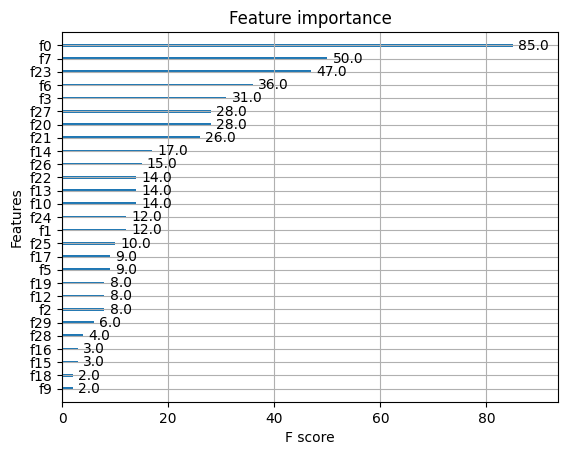

In [42]:
xgb.plot_importance(model)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()